In [4]:
#LINEAR REGRESSION IN ONE VARIABLE
''' The main objective of this notebook is to apply linear regression to a kaggledataset and to get inferences
of the data through matplotlib and enjoy and learn! '''

#The data-set that I am using is one from Kaggle named as graduate-admissions and with a usablity of 7.1
# Find the data-set here. https://www.kaggle.com/mohansacharya/graduate-admissions



' The main objective of this notebook is to apply linear regression to a kaggledataset and to get inferences\nof the data through matplotlib and enjoy and learn! '

In [15]:
# All the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Loading and seeing the dataset

# print(os.getcwd())
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
# df = pd.DataFrame(df)
# df.info()
# Print first 5 rows in df
df.head()
# Print last 5 rows in df
# df.tail()

for i,cols in enumerate(df.columns):
    print((i,cols))


(0, 'Serial No.')
(1, 'GRE Score')
(2, 'TOEFL Score')
(3, 'University Rating')
(4, 'SOP')
(5, 'LOR ')
(6, 'CGPA')
(7, 'Research')
(8, 'Chance of Admit ')


The range of Chance of Admit falls between max:0.97, min:0.34
The range of Gre Score falls between max:340, min:290


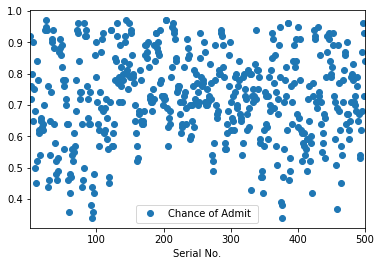

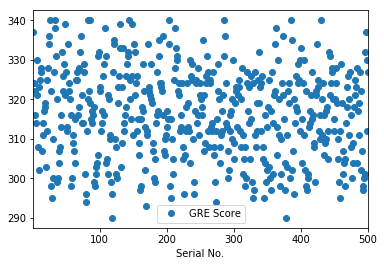

In [49]:
# Now Since we are working with a single variable linear-regression.
#lets choose a variable that has the most impact on Chance of Admissions
# df.plot(df['Serial No.'], df['GRE Score'])
df.plot(x = 'Serial No.', y = 'Chance of Admit ',style = 'o')
df.plot(x = 'Serial No.', y = 'GRE Score', style = 'o')

print('The range of Chance of Admit falls between max:{}, min:{}'.format(max(df['Chance of Admit ']), min(df['Chance of Admit '])))
print('The range of Gre Score falls between max:{}, min:{}'.format(max(df['GRE Score']), min(df['GRE Score'])))


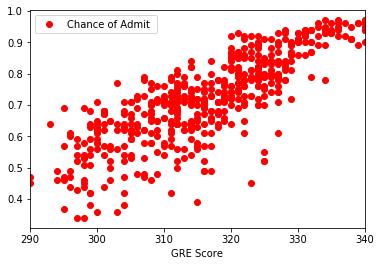

In [55]:
# SO we have a highly differentiated data-points and we want to know the nature of the regression line
# PLus plotting the gre score vs Chance of Admit proves our point
# Making a new dataframe using just the Serial No., GRE Score, Chance of Admit

new_df = df.filter(['Serial No.', 'GRE Score', 'Chance of Admit '])
new_df.head()
new_df.plot(x = 'GRE Score', y = 'Chance of Admit ', style = 'ro')

In [56]:
''' MAIN WORKS STARTS FROM HERE 
PROCEDURE : Now we have a df that contains two values a predictor and a value-outcome.
 1. I assume a line that is y(predicted) = alpha + beta(predictor)
 2. I will predict the value of y keeping in mind that I have to minimize the loss
 3. Will plot the regression line and print the least-square error and Also calculate the RSS.
 '''
# RSS is known as 

' MAIN WORKS STARTS FROM HERE \nPROCEDURE : Now we have a df that contains two values a predictor and a value-outcome.\n 1. I assume a line that is y(predicted) = alpha + beta(predictor)\n 2. I will predict the value of y keeping in mind that I have to minimize the loss\n 3. Will plot the regression line and print the least-square error and Also calculate the RSS.\n '

In [57]:
# Calculate the mean of GRE Score and Chance of Admit
xmean = np.mean(new_df['GRE Score'])
ymean = np.mean(new_df['Chance of Admit '])

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (new_df['GRE Score'] - xmean) * (new_df['Chance of Admit '] - ymean)
df['xvar'] = (new_df['GRE Score'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}\nbeta = {beta}')

alpha = -2.4828146663422896
beta = 0.010125871060764584


In [59]:
# So the line becomes -2.482.. + 0.010125(GRE_SCORE)
# This implies that gre_Score matters not much
# Create new column to store new predictions
new_df['Predicted Chance of Admit'] = alpha + beta * new_df['GRE Score']

# Calculate new SSR with new predictions of Y.
# Note that SST remains the same since yact and ymean do not change.
df['SSR2'] = (new_df['Predicted Chance of Admit'] - ymean)**2
df['SST'] = (new_df['Chance of Admit '] - ymean)**2
SSR2 = df['SSR2'].sum()
SST = df['SST'].sum()

# Calculate new R2
R22 = SSR2 / SST
print(f'New R2 = {R22}.')

New R2 = 0.6566681523957089.


Text(0, 0.5, 'CHANCE OF ADMIT')

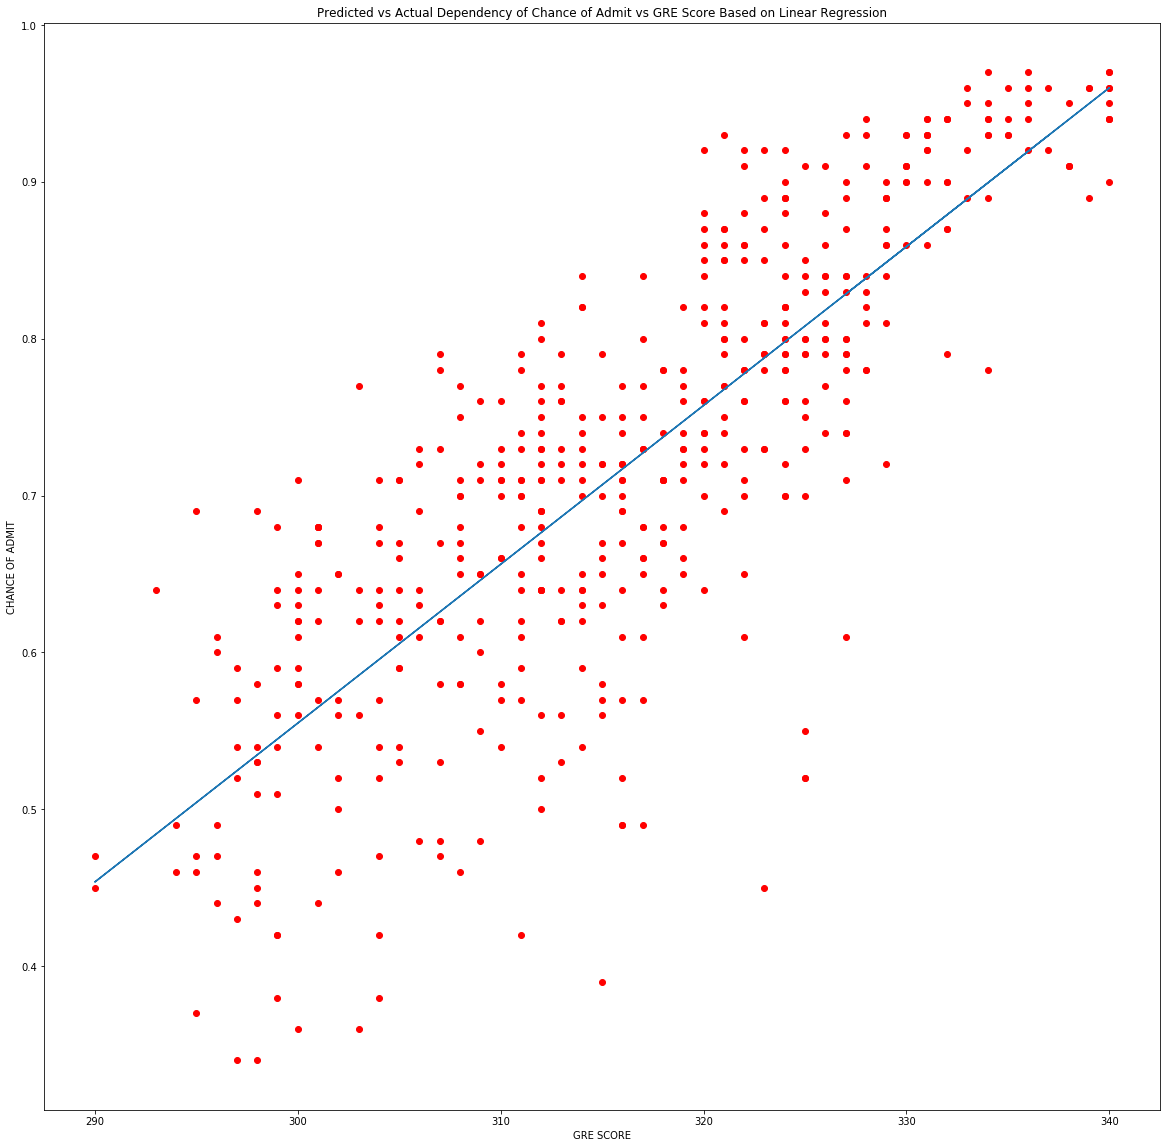

In [64]:
# Now plotting the final pedicted values vs actual values
plt.figure(figsize = (20,20))
plt.plot(new_df['GRE Score'], new_df['Chance of Admit '] , 'ro')
plt.plot(new_df['GRE Score'], new_df['Predicted Chance of Admit'])
plt.title('Predicted vs Actual Dependency of Chance of Admit vs GRE Score Based on Linear Regression')
plt.xlabel('GRE SCORE')
plt.ylabel('CHANCE OF ADMIT')
